CAR PRICE PREDICTION MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
df=pd.read_csv("car data.csv")
df.columns = df.columns.str.strip()

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
#Feature Selection and Feature Engineering
df['Current_Year']=2025
df['Car_Age']=df['Current_Year']-df['Year']
df=df.drop(['Year','Car_Name','Current_Year'],axis=1)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [17]:
#Encoding
df=pd.get_dummies(df,drop_first=True)

In [19]:
df=df.drop(['Transmission_Manual','Seller_Type_Individual'],axis=1)

In [59]:
df.to_csv('Cleaned_data.csv', index=False)

In [21]:
print(df.columns)

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


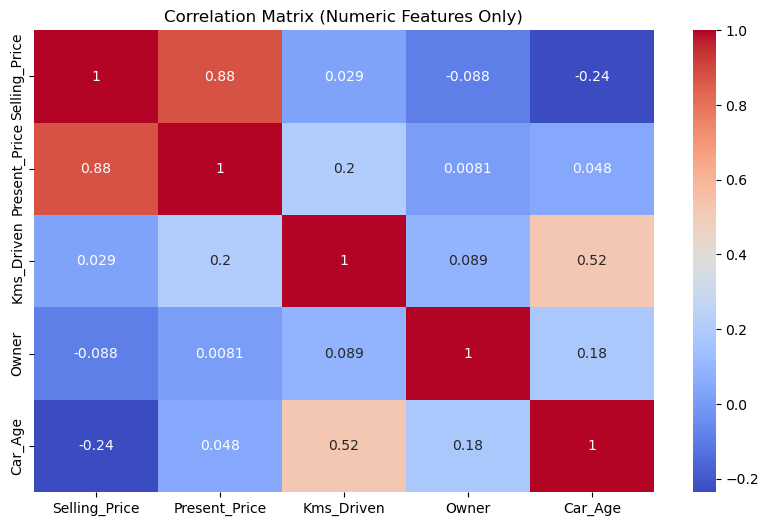

In [23]:
#EDA
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

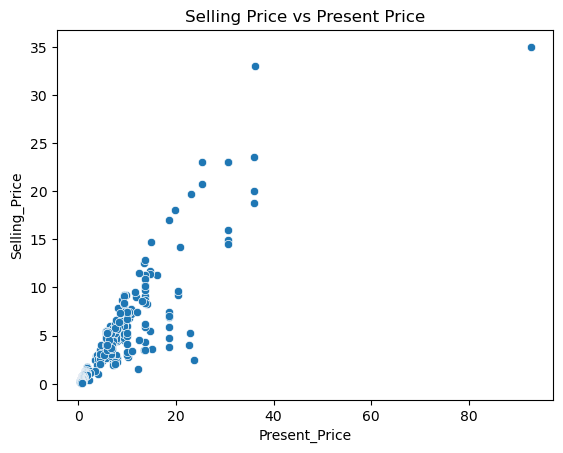

In [24]:
sns.scatterplot(data=df,x='Present_Price',y="Selling_Price")
plt.title("Selling Price vs Present Price")
plt.show()

In [26]:
#Model Training
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

##Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


##Polynomial Regression
poly_pipeline=Pipeline([
('poly', PolynomialFeatures(degree=2,include_bias=False)),
('scaler',StandardScaler()),
('plr',LinearRegression()) ])
poly_pipeline.fit(x_train,y_train)
y_pred_poly=poly_pipeline.predict(x_test)

#Ridge Linear Regression
ridge=Ridge(alpha=100)
ridge.fit(x_train,y_train)
y_pred_ridgeLR=ridge.predict(x_test)

#Lasso Linear Regression
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_lassoLR=lasso.predict(x_test)

#ElasticNet Linear Regression
elastic=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x_train,y_train)
y_pred_ENLR=elastic.predict(x_test)

#RidgePR
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_reg', Ridge(alpha=10))
])
ridge_pipeline.fit(x_train, y_train)
y_pred_ridgePR = ridge_pipeline.predict(x_test)

#Lasso Polynomial Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_reg', Lasso(alpha=0.1))
])
lasso_pipeline.fit(x_train, y_train)
y_pred_lassoPR = lasso_pipeline.predict(x_test)


#ElasticNet Polynomial Regression
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_reg', ElasticNet(alpha=0.1, l1_ratio=0.5))
])
elastic_pipeline.fit(x_train, y_train)
y_pred_ENPR = elastic_pipeline.predict(x_test)


In [28]:
lr.coef_

array([ 4.72475119e-01, -3.52064209e-06, -9.80782911e-01, -4.30899914e-01,
        2.70395925e+00,  4.45611532e-01])

In [31]:
lr.intercept_

5.2790835818532305

In [33]:
print("Linear Regression")
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_Score",r2_score(y_test,y_pred))

Linear Regression
MAE 1.3682093028316793
MSE 3.0476133316906746
RMSE 1.7457414847825192
R2_Score 0.8340666122648224


In [35]:
print("Ridge Linear Regression")
print("R2_Score",r2_score(y_test,y_pred_ridgeLR))

Ridge Linear Regression
R2_Score 0.8562248177855893


In [37]:
print("Lasso Linear Regression")
print("R2_Score",r2_score(y_test,y_pred_lassoLR))

Lasso Linear Regression
R2_Score 0.8536571989394631


In [39]:
print("ElasticNet Linear Regression")
print("R2_Score",r2_score(y_test,y_pred_ENLR))

ElasticNet Linear Regression
R2_Score 0.8512430819779389


In [41]:
print("Polynomial Regression")
print("MAE",mean_absolute_error(y_test,y_pred_poly))
print("MSE",mean_squared_error(y_test,y_pred_poly))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly)))
print("R2_Score",r2_score(y_test,y_pred_poly))

Polynomial Regression
MAE 0.5803478326882815
MSE 0.6289057918779908
RMSE 0.7930358074374642
R2_Score 0.9657579695142305


In [43]:
print("Ridge Polynomial Regression")
print("R2_Score",r2_score(y_test,y_pred_ridgePR))

Ridge Polynomial Regression
R2_Score 0.8233138604391946


In [45]:
print("Lasso Polynomial Regression")
print("R2_Score",r2_score(y_test,y_pred_lassoPR))

Lasso Polynomial Regression
R2_Score 0.8357827273766227


In [47]:
print("ElasticNet Polynomial Regression")
print("R2_Score",r2_score(y_test,y_pred_ENPR))

ElasticNet Polynomial Regression
R2_Score 0.8215900430272556


In [49]:
import pickle
with open('PolynomialModel.pkl', 'wb') as file:
    pickle.dump(poly_pipeline, file)

In [61]:
import pickle
with open('LinearModel.pkl','wb') as file:
    pickle.dump(lr,file)